<a href="https://colab.research.google.com/github/sebile-kayan/Algoritmalar-n-G-venli-E-posta-Ge-idinde-Kullan-lmas-/blob/main/K_EN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
mail=pd.read_csv('/content/Spam_Data.csv')

In [ ]:
mail.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
mail.shape

(5572, 2)

In [ ]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
mail.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
mail.describe().T

,count,unique,top,freq
Category,5572,2,ham,4825
Message,5572,5169,"Sorry, I'll call later",30


In [ ]:
mail["filter"] = mail["Category"].replace(to_replace=["ham", "spam"], value=[0,1])

In [ ]:
mail.head(10)

,Category,Message,filter
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [ ]:
#here we used where to replace the null value
mail1= (mail.where((pd.notnull(mail)),''))

,Message,filter
Category,,
ham,4825,4825
spam,747,747


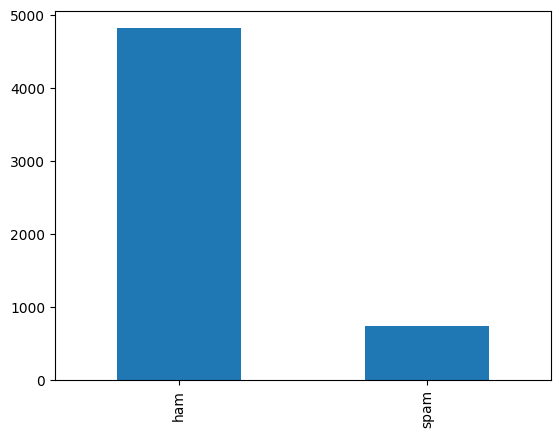

In [ ]:
mail1.Category.value_counts().plot.bar();
mail1.groupby(['Category']).count()

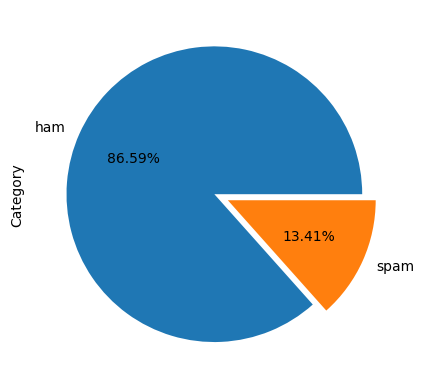

In [ ]:
mail1.Category.value_counts().plot.pie(autopct='%1.2f%%',radius=1,explode=[0,0.1]);

In [ ]:
X=mail1['Message']
Y=mail1['Category']

In [ ]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
Y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mail1['Message'],mail1['filter'], train_size=.8)

In [ ]:
y_train

537     0
5034    0
4454    0
5251    0
288     0
       ..
2045    0
4084    1
5061    0
811     0
3286    0
Name: filter, Length: 4457, dtype: int64

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[0].shape

(7706,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_count, y_train)

KNeighborsClassifier(n_neighbors=3)

# Yeni Bölüm

In [ ]:
emails = [
   'Hey Mohamed, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'You have a big offer in many market and you have 20% cash back ',
    'I ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times'
]
emails_count = v.transform(emails)

In [ ]:
prediction =model.predict(emails_count)
print(prediction)
for i in prediction:
    if i != 1:
        print('ham mail')
    else:
        print('spam mail')

[0 0 0 0]
ham mail
ham mail
ham mail
ham mail


In [ ]:
X_train_count = v.transform(X_train)
Accuracy_on_train =model.score(X_train_count, y_train)
print(f'Accuracy on train :{Accuracy_on_train * (100)}%')

Accuracy on train :95.24343728965673%


In [ ]:
X_test_count = v.transform(X_test)
Accuracy_on_test =model.score(X_test_count, y_test)
print(f'Accuracy on test :{Accuracy_on_test*(100)}%')

Accuracy on test :93.72197309417041%
